# 1. Loading Libraries

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, Input
import pickle  # Add this line to import the pickle module




2024-03-11 22:07:31.871263: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 22:07:31.871366: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 22:07:32.001715: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Loading Dataset and generating visualizations

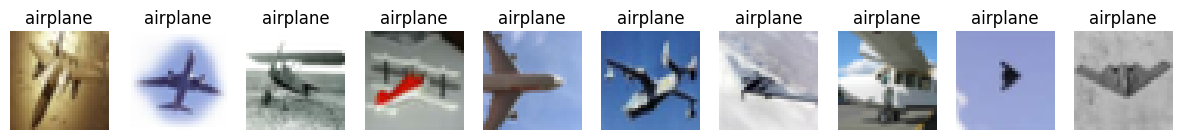

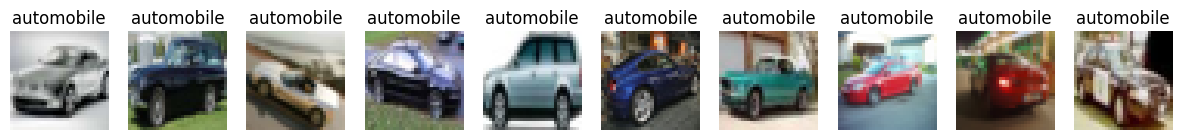

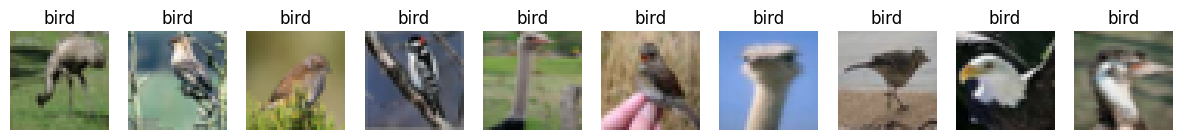

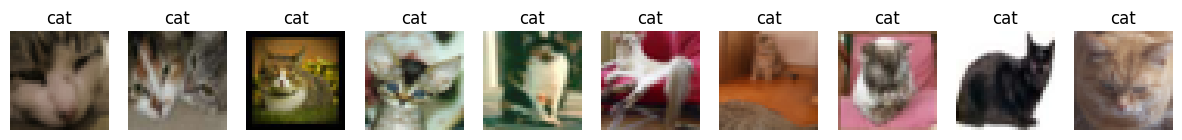

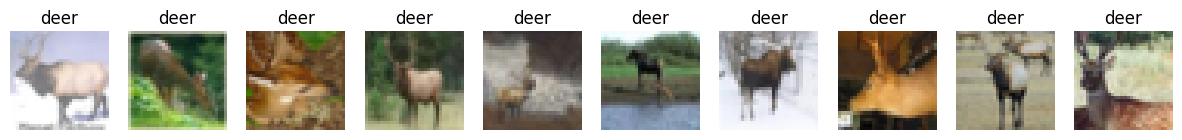

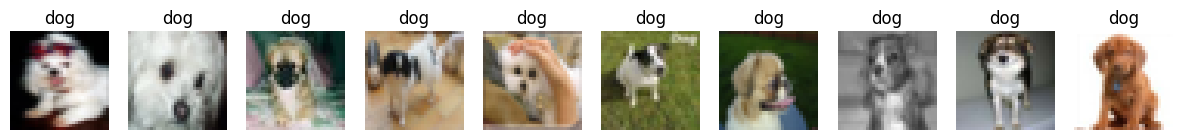

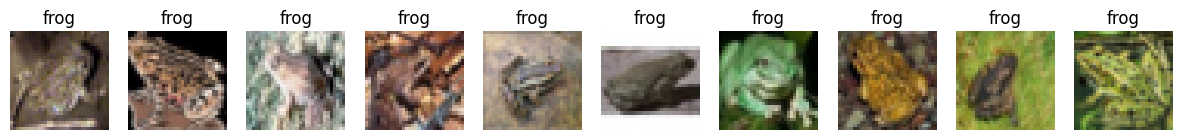

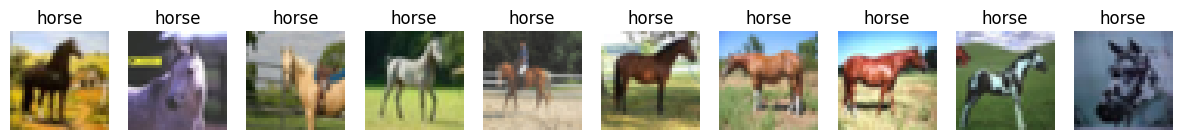

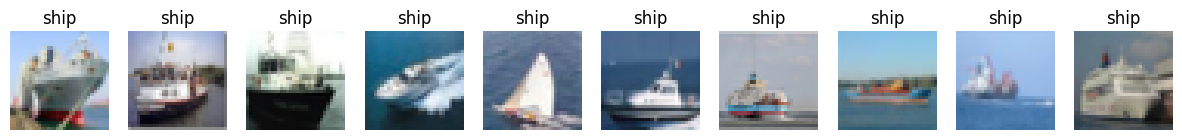

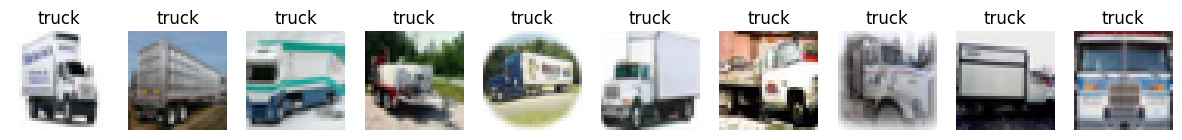

In [2]:
class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
# Function to load all Cifar-10 batches
def load_all_cifar10_batches(directory):
    all_data = []
    for file_name in os.listdir(directory):
        if file_name.startswith("data_batch"):
            file_path = os.path.join(directory, file_name)
            with open(file_path, 'rb') as file:
                data_batch = pickle.load(file, encoding='bytes')
                all_data.append(data_batch)
    return all_data

# Function to display all 10 samples of the same class together in one row
def display_all_samples_by_class(all_data):
    # Create a dictionary to group images by class
    grouped_samples = {label: [] for label in range(10)}

    for data_batch in all_data:
        labels = np.array(data_batch[b'labels'])
        data_batch = np.array(data_batch[b'data'])
        data_batch = data_batch.reshape((len(data_batch), 3, 32, 32)).transpose(0, 2, 3, 1)

        for label in range(10):
            label_indices = np.where(labels == label)[0]
            random_indices = np.random.choice(label_indices, 2, replace=False)
            grouped_samples[label].extend(data_batch[random_indices])

    # Display all 10 samples of the same class together in one row
    for label, samples in grouped_samples.items():
        plt.figure(figsize=(15, 3))
        for i, image in enumerate(samples):
            plt.subplot(1, 10, i + 1)
            plt.imshow(image)
            plt.title(class_names[label])
            plt.axis('off')
        plt.show()

# Directory containing Cifar-10 batches
directory = '/kaggle/input/cifar10-python/cifar-10-batches-py'

# Load all batches of the dataset
all_cifar10_data = load_all_cifar10_batches(directory)

# Display all 10 samples of the same class together in one row
display_all_samples_by_class(all_cifar10_data)


# 2. Splitting data into train, validation, and test split

In [3]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Training set shape: (40000, 32, 32, 3) (40000, 1)
Validation set shape: (10000, 32, 32, 3) (10000, 1)
Testing set shape: (10000, 32, 32, 3) (10000, 1)


# Perform Data Normalization

In [4]:
# Normalize pixel values to be between 0 and 1
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

In [5]:
model = models.Sequential()

# Replace the input_shape parameter with an Input layer
model.add(Input(shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, 
                    validation_data=(X_val, y_val))

Epoch 1/40


2024-03-11 22:08:10.719468: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1809: 6.57455, expected 5.77917
2024-03-11 22:08:10.719526: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1873: 6.94706, expected 6.15168
2024-03-11 22:08:10.719535: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1874: 6.59592, expected 5.80054
2024-03-11 22:08:10.719543: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1877: 6.39789, expected 5.60251
2024-03-11 22:08:10.719551: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1950: 6.58588, expected 5.7905
2024-03-11 22:08:10.719559: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1970: 6.0549, expected 5.25952
2024-03-11 22:08:10.719567: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1982: 6.81896, expected 6.02358
2024-03-11 22:08:10.719574: E extern

  63/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1375 - loss: 2.2505

I0000 00:00:1710194892.666270      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3201 - loss: 1.8201

2024-03-11 22:08:17.152279: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 976: 6.51374, expected 5.75429
2024-03-11 22:08:17.152339: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1050: 6.23674, expected 5.47729
2024-03-11 22:08:17.152349: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1069: 6.48415, expected 5.7247
2024-03-11 22:08:17.152357: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1100: 6.12951, expected 5.37006
2024-03-11 22:08:17.152364: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1113: 6.51051, expected 5.75106
2024-03-11 22:08:17.152372: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1115: 6.56365, expected 5.8042
2024-03-11 22:08:17.152380: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1130: 6.45302, expected 5.69357
2024-03-11 22:08:17.152387: E externa

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3205 - loss: 1.8190 - val_accuracy: 0.5048 - val_loss: 1.3685
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5324 - loss: 1.3027 - val_accuracy: 0.5826 - val_loss: 1.1814
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6003 - loss: 1.1277 - val_accuracy: 0.6310 - val_loss: 1.0438
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6369 - loss: 1.0227 - val_accuracy: 0.6452 - val_loss: 1.0151
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6683 - loss: 0.9375 - val_accuracy: 0.6646 - val_loss: 0.9557
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6960 - loss: 0.8573 - val_accuracy: 0.6659 - val_loss: 0.9456
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7126 - loss: 0.8118 - val_accuracy: 0.6706 - val_loss: 0.9343
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7330 - loss: 0.7638 - val_accurac